<a href="https://colab.research.google.com/github/geworgia/git/blob/main/stuper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### data source: UCI (DOI: 10.24432/C58D0H)
### initial format: arff

In [ ]:
import pandas as pd
from scipy.io import arff

file_path = "/content/stuPer.arff"
data, meta = arff.loadarff(file_path)

df = pd.DataFrame(data)

for col in df.select_dtypes([object]):
    df[col] = df[col].str.decode("utf-8")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


import pandas as pd
from scipy.io import arff
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# EDA

In [ ]:
df.head()

,Performance,Gender,Caste,coaching,time,Class_ten_education,twelve_education,medium,Class_ X_Percentage,Class_XII_Percentage,Father_occupation,Mother_occupation
0,Excellent,male,General,NO,ONE,SEBA,AHSEC,ENGLISH,Excellent,Excellent,DOCTOR,OTHERS
1,Excellent,male,OBC,WA,TWO,SEBA,AHSEC,OTHERS,Excellent,Excellent,SCHOOL_TEACHER,HOUSE_WIFE
2,Excellent,male,OBC,OA,TWO,OTHERS,CBSE,ENGLISH,Excellent,Excellent,BUSINESS,HOUSE_WIFE
3,Excellent,male,General,WA,ONE,SEBA,AHSEC,OTHERS,Excellent,Excellent,SCHOOL_TEACHER,SCHOOL_TEACHER
4,Excellent,male,General,OA,TWO,SEBA,CBSE,ENGLISH,Excellent,Excellent,COLLEGE_TEACHER,HOUSE_WIFE


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Performance           666 non-null    object
 1   Gender                666 non-null    object
 2   Caste                 666 non-null    object
 3   coaching              666 non-null    object
 4   time                  666 non-null    object
 5   Class_ten_education   666 non-null    object
 6   twelve_education      666 non-null    object
 7   medium                666 non-null    object
 8   Class_ X_Percentage   666 non-null    object
 9   Class_XII_Percentage  666 non-null    object
 10  Father_occupation     666 non-null    object
 11  Mother_occupation     666 non-null    object
dtypes: object(12)
memory usage: 62.6+ KB


In [ ]:
df.describe()

,Performance,Gender,Caste,coaching,time,Class_ten_education,twelve_education,medium,Class_ X_Percentage,Class_XII_Percentage,Father_occupation,Mother_occupation
count,666,666,666,666,666,666,666,666,666,666,666,666
unique,4,2,4,3,6,3,3,3,4,4,8,9
top,Good,male,General,WA,TWO,SEBA,AHSEC,ENGLISH,Excellent,Excellent,OTHERS,HOUSE_WIFE
freq,210,355,329,449,368,396,368,536,511,398,277,442


In [ ]:
df.nunique()

,0
Performance,4
Gender,2
Caste,4
coaching,3
time,6
Class_ten_education,3
twelve_education,3
medium,3
Class_ X_Percentage,4
Class_XII_Percentage,4


In [ ]:
df.isnull().sum()

,0
Performance,0
Gender,0
Caste,0
coaching,0
time,0
Class_ten_education,0
twelve_education,0
medium,0
Class_ X_Percentage,0
Class_XII_Percentage,0


<ipython-input-8-52ae009b8e5c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Performance", order=df["Performance"].value_counts().index, palette="viridis")


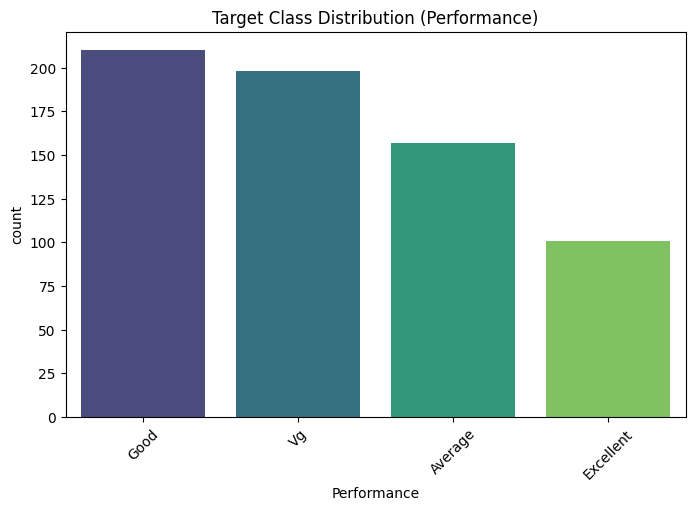

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Performance", order=df["Performance"].value_counts().index, palette="viridis")
plt.title("Target Class Distribution (Performance)")
plt.xticks(rotation=45)
plt.show()

<ipython-input-9-7f130d1964a1>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, ax=axes[i], palette=pastel_palette)
<ipython-input-9-7f130d1964a1>:11: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.countplot(x=col, data=df, ax=axes[i], palette=pastel_palette)
<ipython-input-9-7f130d1964a1>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, ax=axes[i], palette=pastel_palette)
<ipython-input-9-7f130d1964a1>:11: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(x=col, data=df, ax=axes[i], palette=pastel_palette)
<ipython-input-9-7f130d1964a1>:1

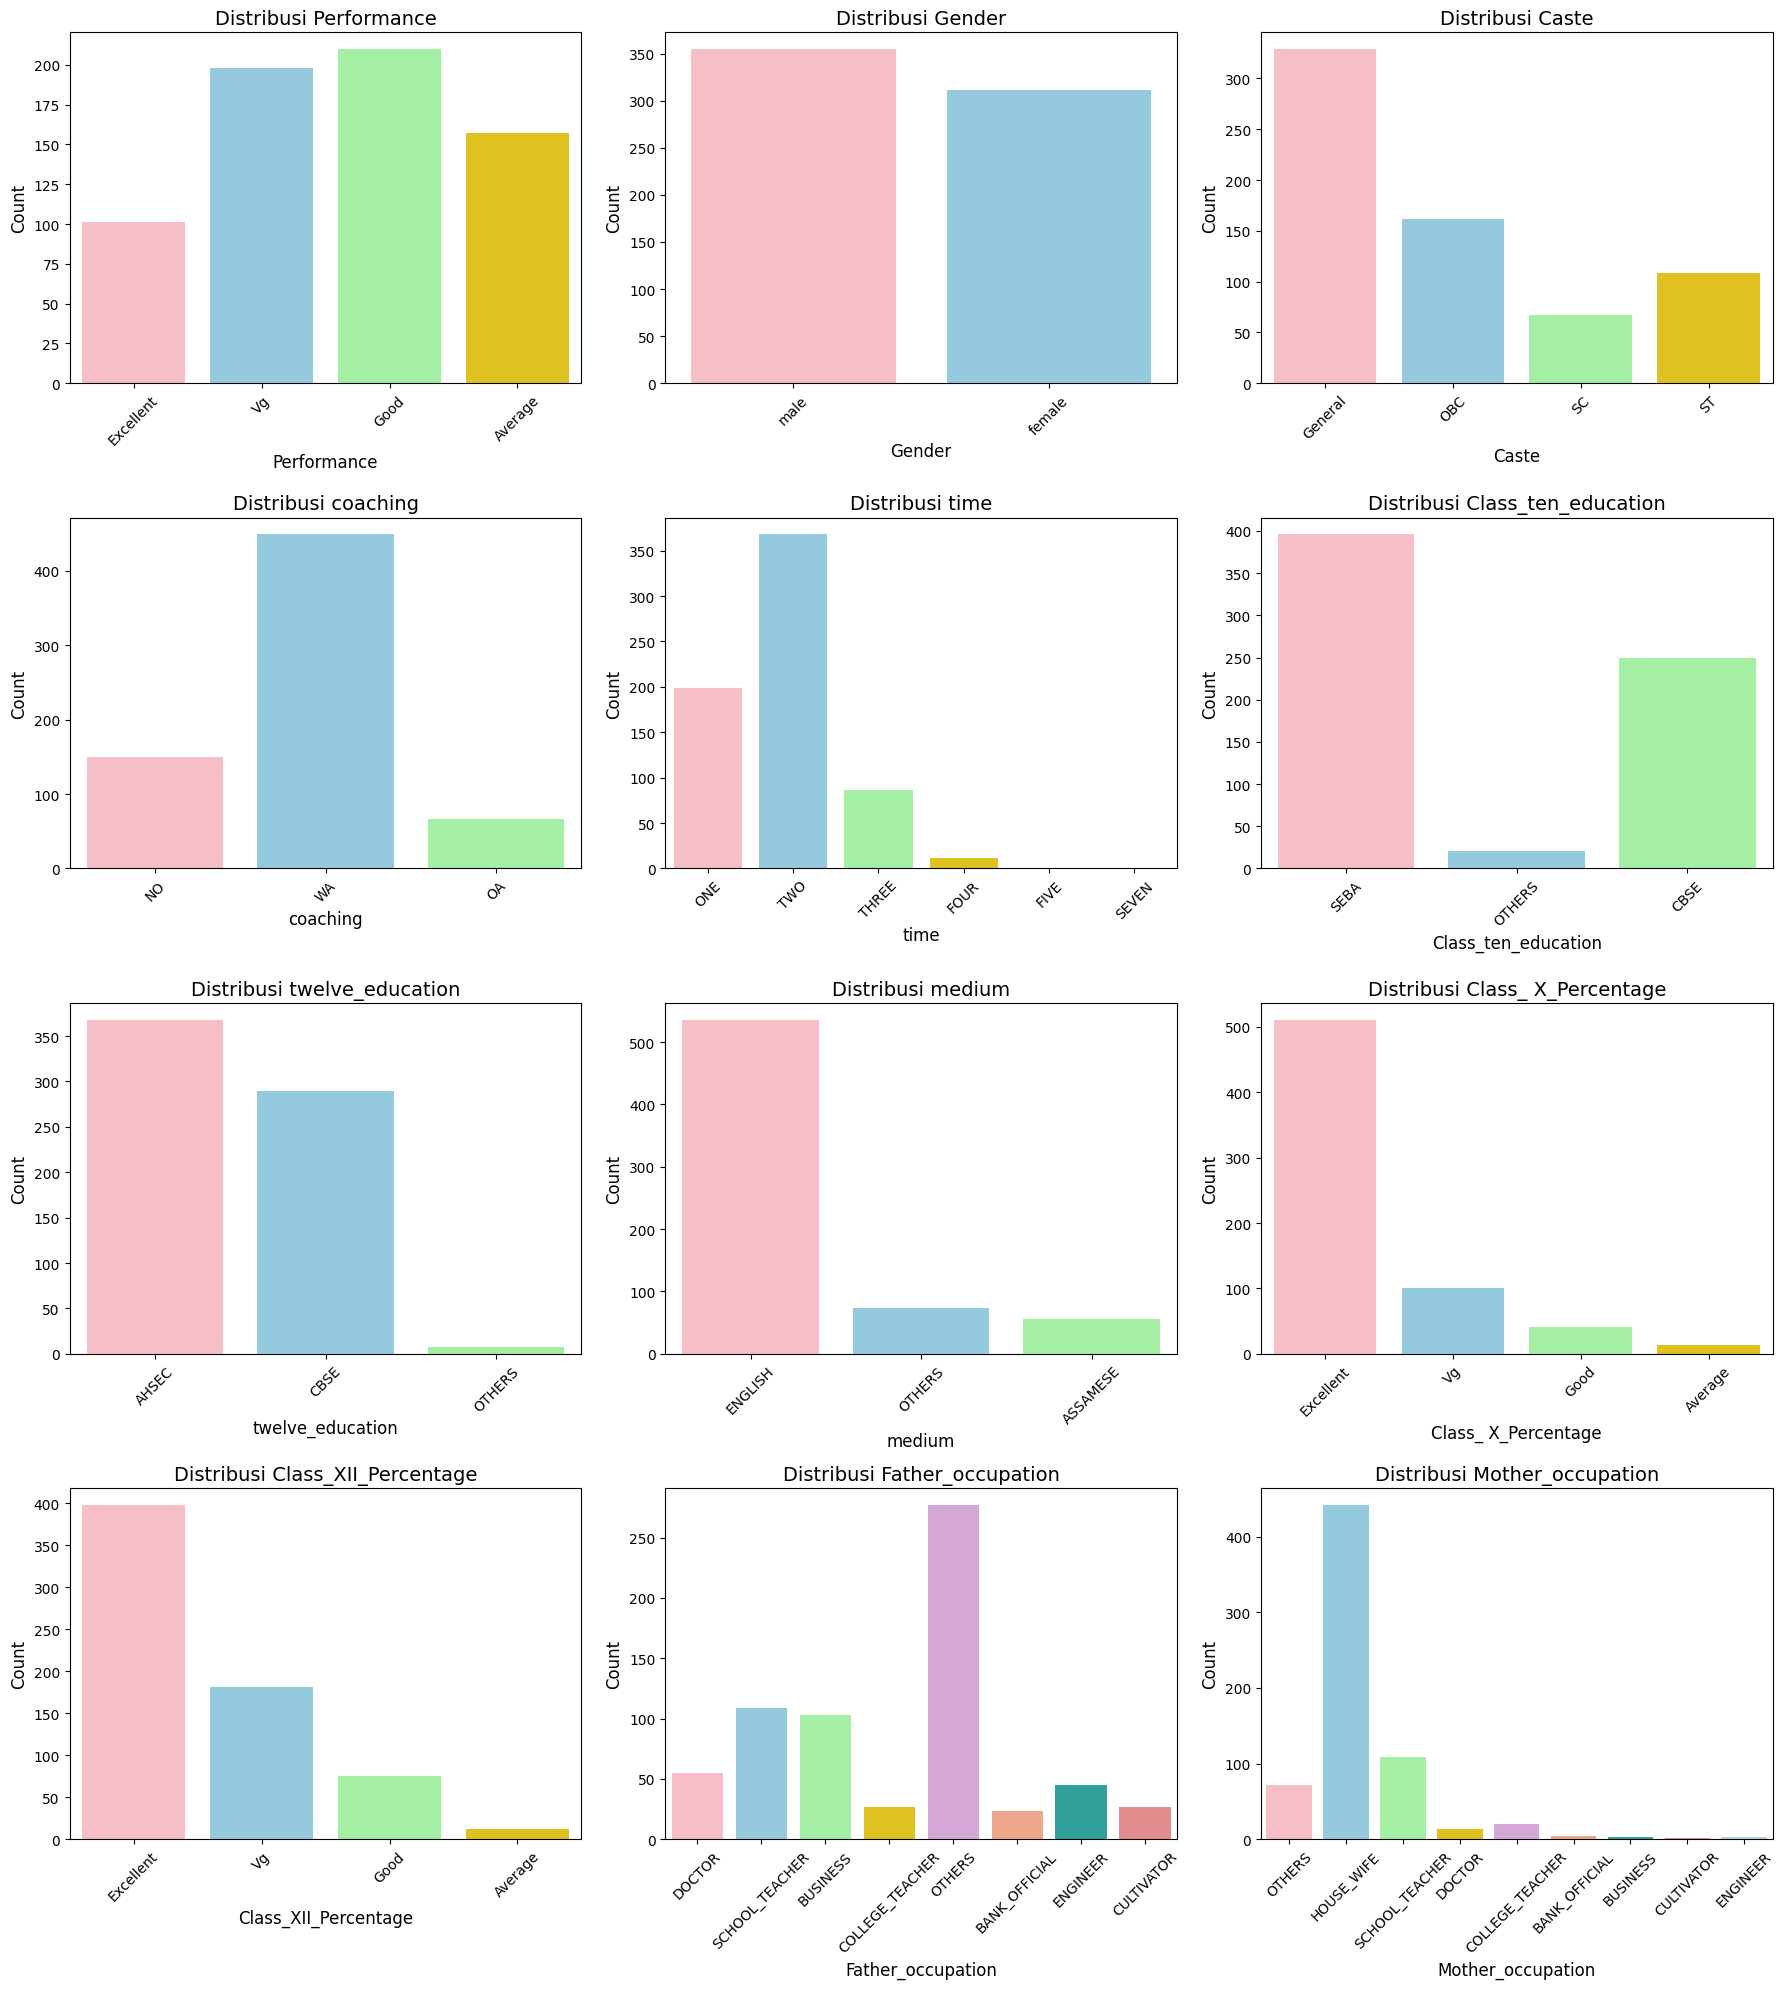

In [ ]:
pastel_palette = ['#FFB6C1', '#87CEEB', '#98FB98', '#FFD700', '#DDA0DD', '#FFA07A', '#20B2AA', '#F08080', '#ADD8E6', '#90EE90']
categorical_features = df.select_dtypes(include=['object']).columns

num_plots = len(categorical_features)
rows = (num_plots // 3) + (1 if num_plots % 3 != 0 else 0)

fig, axes = plt.subplots(rows, 3, figsize=(18, rows * 5))
axes = axes.flatten()

for i, col in enumerate(categorical_features):
    sns.countplot(x=col, data=df, ax=axes[i], palette=pastel_palette)
    axes[i].set_title(f'Distribusi {col}', fontsize=14)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

just categorical, coz there is no numeric type.

<ipython-input-10-c67eb3a9c986>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, palette='pastel', order=df[col].value_counts().index)
<ipython-input-10-c67eb3a9c986>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, palette='pastel', order=df[col].value_counts().index)
<ipython-input-10-c67eb3a9c986>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, palette='pastel', order=df[col].value_counts().index)
<ipython-input-10-c67eb3a9c986>:6: FutureWarning: 

Passing `palette` without assigning 

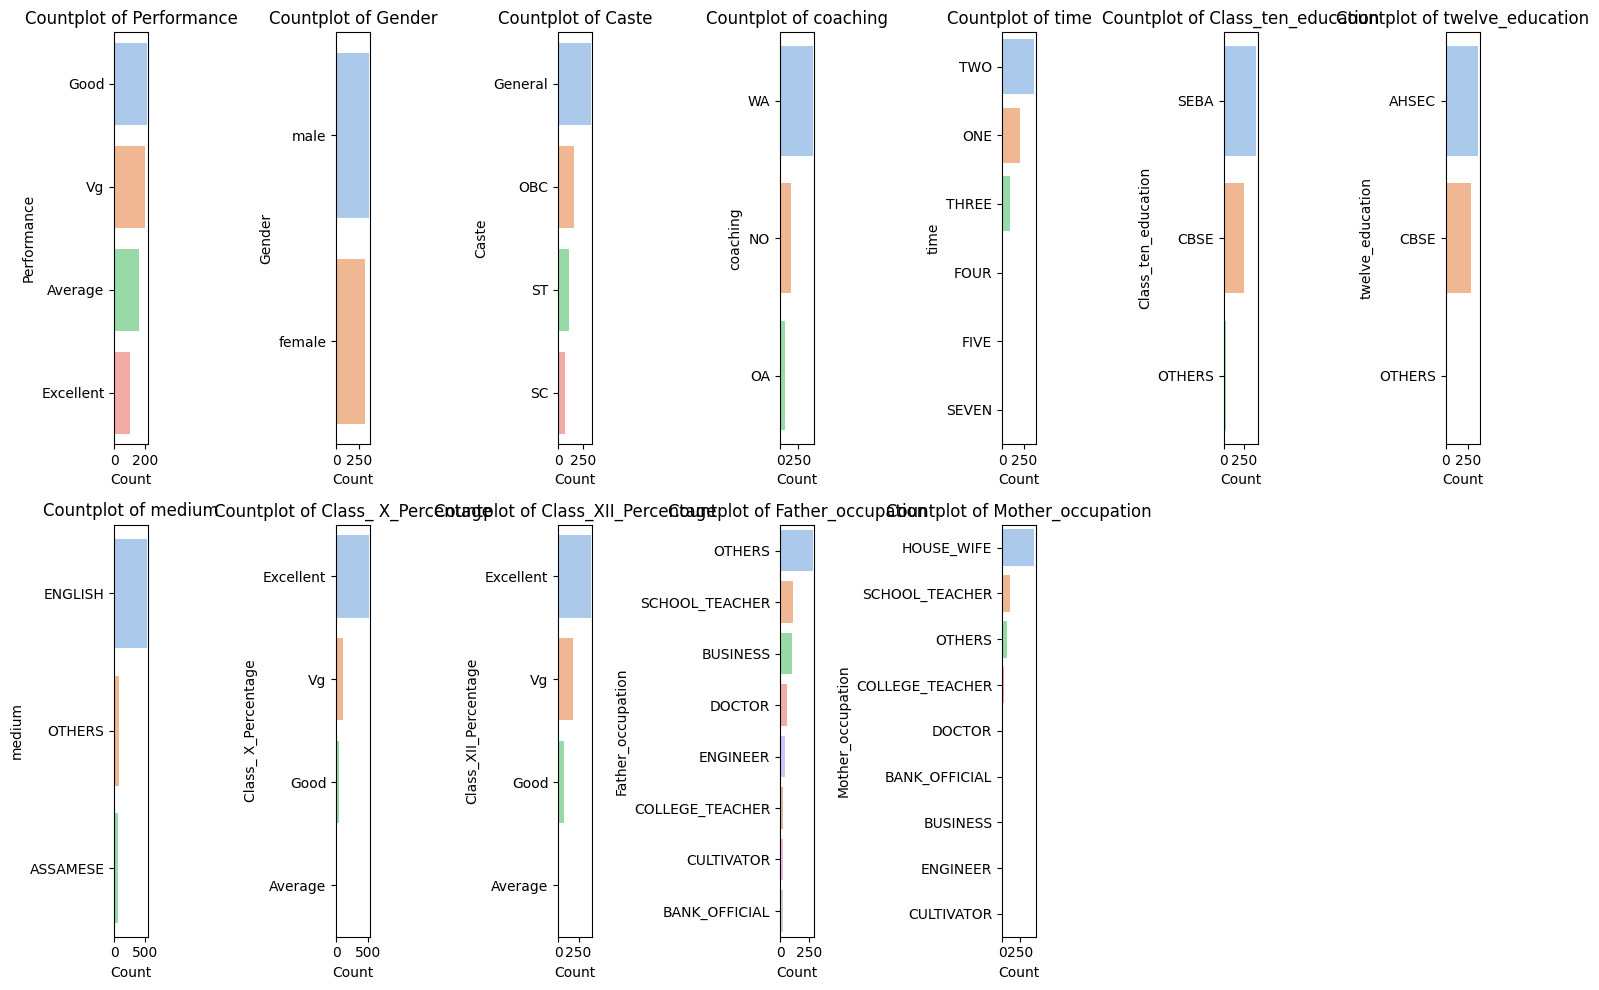

In [ ]:
categorical_features = df.select_dtypes(include=['object']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(2, len(categorical_features)//2 + 1, i)
    sns.countplot(y=col, data=df, palette='pastel', order=df[col].value_counts().index)
    plt.title(f'Countplot of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

In [ ]:
for col in categorical_features:
    freq = df[col].value_counts(normalize=True) * 100
    print(f"Persentase frekuensi untuk {col}:\n{freq}\n")

Persentase frekuensi untuk Performance:
Performance
Good         31.531532
Vg           29.729730
Average      23.573574
Excellent    15.165165
Name: proportion, dtype: float64

Persentase frekuensi untuk Gender:
Gender
male      53.303303
female    46.696697
Name: proportion, dtype: float64

Persentase frekuensi untuk Caste:
Caste
General    49.399399
OBC        24.324324
ST         16.216216
SC         10.060060
Name: proportion, dtype: float64

Persentase frekuensi untuk coaching:
coaching
WA    67.417417
NO    22.522523
OA    10.060060
Name: proportion, dtype: float64

Persentase frekuensi untuk time:
time
TWO      55.255255
ONE      29.879880
THREE    12.912913
FOUR      1.651652
FIVE      0.150150
SEVEN     0.150150
Name: proportion, dtype: float64

Persentase frekuensi untuk Class_ten_education:
Class_ten_education
SEBA      59.459459
CBSE      37.387387
OTHERS     3.153153
Name: proportion, dtype: float64

Persentase frekuensi untuk twelve_education:
twelve_education
AHSEC     

In [ ]:
from scipy.stats import entropy

for col in categorical_features:
    freq = df[col].value_counts(normalize=True)
    ent = entropy(freq)
    print(f"Entropy untuk {col}: {ent:.4f}")

Entropy untuk Performance: 1.3512
Entropy untuk Gender: 0.6910
Entropy untuk Caste: 1.2183
Entropy untuk coaching: 0.8326
Entropy untuk time: 1.0403
Entropy untuk Class_ten_education: 0.7859
Entropy untuk twelve_education: 0.7429
Entropy untuk medium: 0.6271
Entropy untuk Class_ X_Percentage: 0.7378
Entropy untuk Class_XII_Percentage: 0.9800
Entropy untuk Father_occupation: 1.7139
Entropy untuk Mother_occupation: 1.0788


<ipython-input-13-0f379d4e1900>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df[df[col].isin(rare_categories)], palette='pastel')
<ipython-input-13-0f379d4e1900>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df[df[col].isin(rare_categories)], palette='pastel')


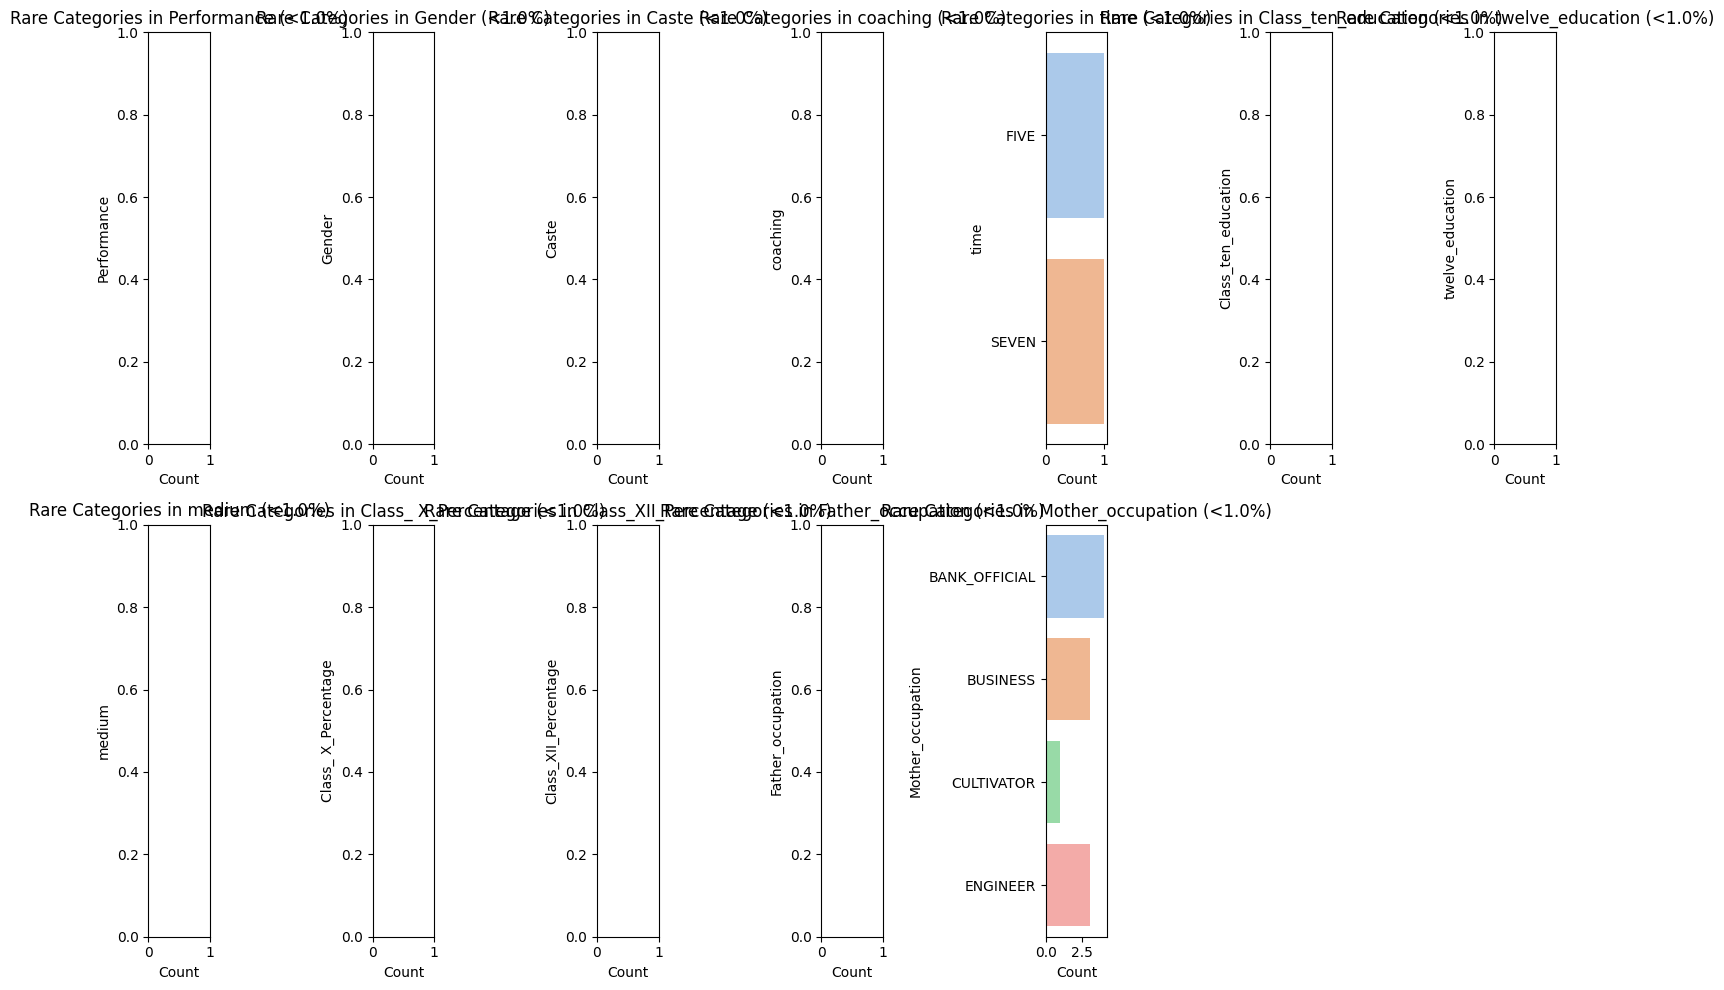

In [ ]:
threshold = 0.01  # 1%

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(2, len(categorical_features)//2 + 1, i)
    freq = df[col].value_counts(normalize=True)
    rare_categories = freq[freq < threshold].index
    sns.countplot(y=col, data=df[df[col].isin(rare_categories)], palette='pastel')
    plt.title(f'Rare Categories in {col} (<{threshold*100}%)')
    plt.xlabel('Count')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

In [ ]:
combination = df.groupby(['Gender', 'Caste']).size().reset_index(name='Count')
rare_combinations = combination[combination['Count'] < 5]  # Kombinasi yang muncul kurang dari 5 kali
print("Kombinasi kategori yang jarang muncul:\n", rare_combinations)

Kombinasi kategori yang jarang muncul:
 Empty DataFrame
Columns: [Gender, Caste, Count]
Index: []


In [ ]:
def handle_rare_categories(df, column, threshold=0.01):
    # Hitung frekuensi kategori
    freq = df[column].value_counts(normalize=True)
    # Identifikasi kategori yang jarang muncul
    rare_categories = freq[freq < threshold].index
    # Ganti kategori yang jarang muncul dengan "OTHERS"
    df[column] = df[column].replace(rare_categories, 'OTHERS')
    return df

categorical_columns = ['time', 'Class_ten_education', 'twelve_education', 'Father_occupation', 'Mother_occupation']

for col in categorical_columns:
    df = handle_rare_categories(df, col, threshold=0.01)

for col in categorical_columns:
    print(f"Distribusi setelah handling outlier untuk {col}:\n{df[col].value_counts(normalize=True)}\n")

Distribusi setelah handling outlier untuk time:
time
TWO       0.552553
ONE       0.298799
THREE     0.129129
FOUR      0.016517
OTHERS    0.003003
Name: proportion, dtype: float64

Distribusi setelah handling outlier untuk Class_ten_education:
Class_ten_education
SEBA      0.594595
CBSE      0.373874
OTHERS    0.031532
Name: proportion, dtype: float64

Distribusi setelah handling outlier untuk twelve_education:
twelve_education
AHSEC     0.552553
CBSE      0.435435
OTHERS    0.012012
Name: proportion, dtype: float64

Distribusi setelah handling outlier untuk Father_occupation:
Father_occupation
OTHERS             0.415916
SCHOOL_TEACHER     0.163664
BUSINESS           0.154655
DOCTOR             0.082583
ENGINEER           0.067568
COLLEGE_TEACHER    0.040541
CULTIVATOR         0.040541
BANK_OFFICIAL      0.034535
Name: proportion, dtype: float64

Distribusi setelah handling outlier untuk Mother_occupation:
Mother_occupation
HOUSE_WIFE         0.663664
SCHOOL_TEACHER     0.162162
OTHE

preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df.head()

,Performance,Gender,Caste,coaching,time,Class_ten_education,twelve_education,medium,Class_ X_Percentage,Class_XII_Percentage,Father_occupation,Mother_occupation
0,1,1,0,0,1,2,0,1,1,1,4,3
1,1,1,1,2,4,2,0,2,1,1,7,2
2,1,1,1,1,4,1,1,1,1,1,1,2
3,1,1,0,2,1,2,0,2,1,1,7,4
4,1,1,0,1,4,2,1,1,1,1,2,2


In [ ]:
X = df.drop('Performance', axis=1)
y = df['Performance']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# modelling

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC()
}

results = {}
for name, model in models.items():
    model.fit(X_train_smote, y_train_smote)  # Gunakan data yang sudah di-SMOTE
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
print(results_df)

Logistic Regression Accuracy: 0.4552
              precision    recall  f1-score   support

           0       0.78      0.90      0.84        31
           1       0.29      0.48      0.36        27
           2       0.40      0.35      0.38        34
           3       0.35      0.19      0.25        42

    accuracy                           0.46       134
   macro avg       0.45      0.48      0.45       134
weighted avg       0.45      0.46      0.44       134

Decision Tree Accuracy: 0.3881
              precision    recall  f1-score   support

           0       0.69      0.58      0.63        31
           1       0.29      0.22      0.25        27
           2       0.25      0.41      0.31        34
           3       0.44      0.33      0.38        42

    accuracy                           0.39       134
   macro avg       0.42      0.39      0.39       134
weighted avg       0.42      0.39      0.39       134

Random Forest Accuracy: 0.4104
              precision    reca

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

base_models = [
    ('lr', LogisticRegression()),
    ('dt', DecisionTreeClassifier()),
    ('rf', RandomForestClassifier()),
    ('gb', GradientBoostingClassifier()),
    ('svm', SVC(probability=True))  # SVM perlu probability=True untuk stacking
]

meta_model = LogisticRegression()

stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

stacking_model.fit(X_train_smote, y_train_smote)

y_pred_stacking = stacking_model.predict(X_test)

accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print(f"Stacking Classifier Accuracy: {accuracy_stacking:.4f}")
print(classification_report(y_test, y_pred_stacking))

Stacking Classifier Accuracy: 0.4925
              precision    recall  f1-score   support

           0       0.77      0.87      0.82        31
           1       0.38      0.19      0.25        27
           2       0.35      0.41      0.38        34
           3       0.43      0.48      0.45        42

    accuracy                           0.49       134
   macro avg       0.49      0.49      0.48       134
weighted avg       0.48      0.49      0.48       134



In [ ]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')

xgb_model.fit(X_train_smote, y_train_smote)

y_pred_xgb = xgb_model.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.4403
              precision    recall  f1-score   support

           0       0.75      0.68      0.71        31
           1       0.46      0.22      0.30        27
           2       0.29      0.41      0.34        34
           3       0.40      0.43      0.41        42

    accuracy                           0.44       134
   macro avg       0.48      0.43      0.44       134
weighted avg       0.47      0.44      0.44       134



In [ ]:
from sklearn.model_selection import GridSearchCV

# Contoh tuning untuk XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_smote, y_train_smote)

# Model terbaik
best_xgb_model = grid_search.best_estimator_

# Prediksi
y_pred_best_xgb = best_xgb_model.predict(X_test)

# Evaluasi
accuracy_best_xgb = accuracy_score(y_test, y_pred_best_xgb)
print(f"Best XGBoost Accuracy: {accuracy_best_xgb:.4f}")
print(classification_report(y_test, y_pred_best_xgb))

AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [ ]:
from lightgbm import LGBMClassifier

# Buat model LightGBM
lgbm_model = LGBMClassifier(random_state=42)

# Latih model
lgbm_model.fit(X_train_smote, y_train_smote)

# Prediksi
y_pred_lgbm = lgbm_model.predict(X_test)

# Evaluasi
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
print(f"LightGBM Accuracy: {accuracy_lgbm:.4f}")
print(classification_report(y_test, y_pred_lgbm))

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000569 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 212
[LightGBM] [Info] Number of data points in the train set: 704, number of used features: 11
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
from catboost import CatBoostClassifier

# Buat model CatBoost
catboost_model = CatBoostClassifier(random_state=42, verbose=0)

# Latih model
catboost_model.fit(X_train_smote, y_train_smote)

# Prediksi
y_pred_catboost = catboost_model.predict(X_test)

# Evaluasi
accuracy_catboost = accuracy_score(y_test, y_pred_catboost)
print(f"CatBoost Accuracy: {accuracy_catboost:.4f}")
print(classification_report(y_test, y_pred_catboost))

ModuleNotFoundError: No module named 'catboost'

In [ ]:
results = {
    "Stacking Classifier": accuracy_stacking,
    "XGBoost": accuracy_xgb,
    "Best XGBoost (GridSearchCV)": accuracy_best_xgb,
    "LightGBM": accuracy_lgbm,
    "CatBoost": accuracy_catboost
}

results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
print(results_df)